In [124]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [125]:
df=pd.read_csv("dataset/student_scores2.csv")
df.head()

,Hours,IQ,Scores,Pass
0,2.3,80,18,0
1,5.0,80,45,1
2,3.2,70,25,0
3,8.5,90,72,1
4,3.5,70,30,0


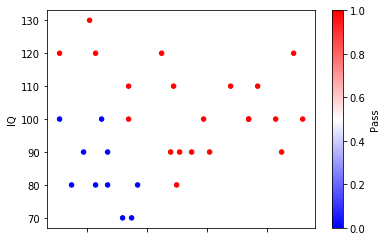

In [126]:
df.plot.scatter(x='Hours',y='IQ',c='Pass',colormap='bwr')
plt.xlabel('Hours')
plt.ylabel('IQ')
plt.show()

In [127]:
X=df.drop(["Pass","Scores"],axis=1).values
y=df["Pass"].values.reshape(-1,1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [128]:
scaler = StandardScaler()

In [129]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [130]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_prime(x):
    return x*(1-x)

In [131]:
class NeuralNetwork(object):
    
    
    def __init__(self,input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_units = 3
        
        self.w1= np.zeros((self.input_size,self.hidden_units))
        self.w2= np.zeros((self.hidden_units,self.output_size))
        
    def foreward(self,X_train):
        self.output1 = sigmoid(np.dot(X_train,self.w1))
        self.output2 = sigmoid(np.dot(self.output1,self.w2))
        return self.output2
    
    def backward(self,X_train,y_train):
        
        delta_w2 = (self.output2 - y_train)* sigmoid_prime(self.output2)
        delta_w1 = delta_w2.dot(self.w2.T)* sigmoid_prime(self.output1)
        
        self.w2 = self.w2 + self.output1.T.dot(delta_w2)*-1
        self.w1 = self.w1 + X_train.T.dot(delta_w1)*-1
        
    def fit(self,X_train,y_train):
        self.foreward(X_train)
        self.backward(X_train,y_train)
        
    def predict(self,X_test):
        
        return y_prediction
    
    def score(self,x,y):
        prediction = self.foreward(x)
        score = np.mean(np.square(y-prediction))
        return score
        
        
        

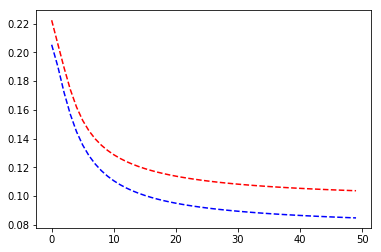

In [132]:
nn=NeuralNetwork(input_size=2,output_size=1)
train_loss = []
test_loss = []
for i in range(50):
    nn.fit(X_train,y_train)
    train_loss.append((nn.score(X_train,y_train)))
    test_loss.append((nn.score(X_test,y_test)))

plt.plot(train_loss,"r--")
plt.plot(test_loss,"b--")
plt.show()